## Chapter 4 [Spectroscopy](Ch4-Spectroscopy.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Bremsstrahlung


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes
part of 
 

## First we import the essential libraries
All we need here should come with the annaconda or any other package

In [2]:
#import martplotlib and numpy with a magic comand
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


## Bremsstrahlung
The Bremsstrahlung causes the background the characteristic X-ray peaks are sitting on.


Because of the repulsion a fast electron by the negative electron cloud in a solid. such an electron will be de-accelerated or deflected. Any acceleration (negative or positive) is related with a photon (possibly only as an exchagne particle which is the basis of Quantum Eletrodynamics).

![X-Ray_Auger](./images_EDS/Bremsstrahlung1.jpg)

The energy loss in the braking of an electron will cause the emission of Bremsstrahlung (braking radiation). The energy of the photon of this electromagnetic radiation is directly the photon energy.

Thus the Bremsstrahlung spans the energies from the incident electron's energy down to a practical limit of about 100eV. The Bremsstrahlung is therefore sometimes refered to as X-ray continuum.



The Bremsstrahlung is anoistropic, peaked in the forwad direction of the incident electron.




## Kramer's formulation of Bremsstrahlung

Kramers' formula for Bremsstrahlung is the most basic (and not very accurate) description of Bremsstrahlung vs energy:

$$ N_E = IKZ \frac{(E-E_0)}{E}$$

- K -- A constant,
- Z -- The average atomic number of the specimen,
- E0 -- The incident beam energy, 
- I -- The electron beam current,
- E -- The continuum photon energy.

The factor K in Kramers’ law actually takes
account of numerous parameters. These include
- Kramers’ original constant.
- The collection efficiency of the detector.
- The processing efficiency of the detector.
- The absorption of X-rays within the specimen.

<IPython.core.display.Javascript object>


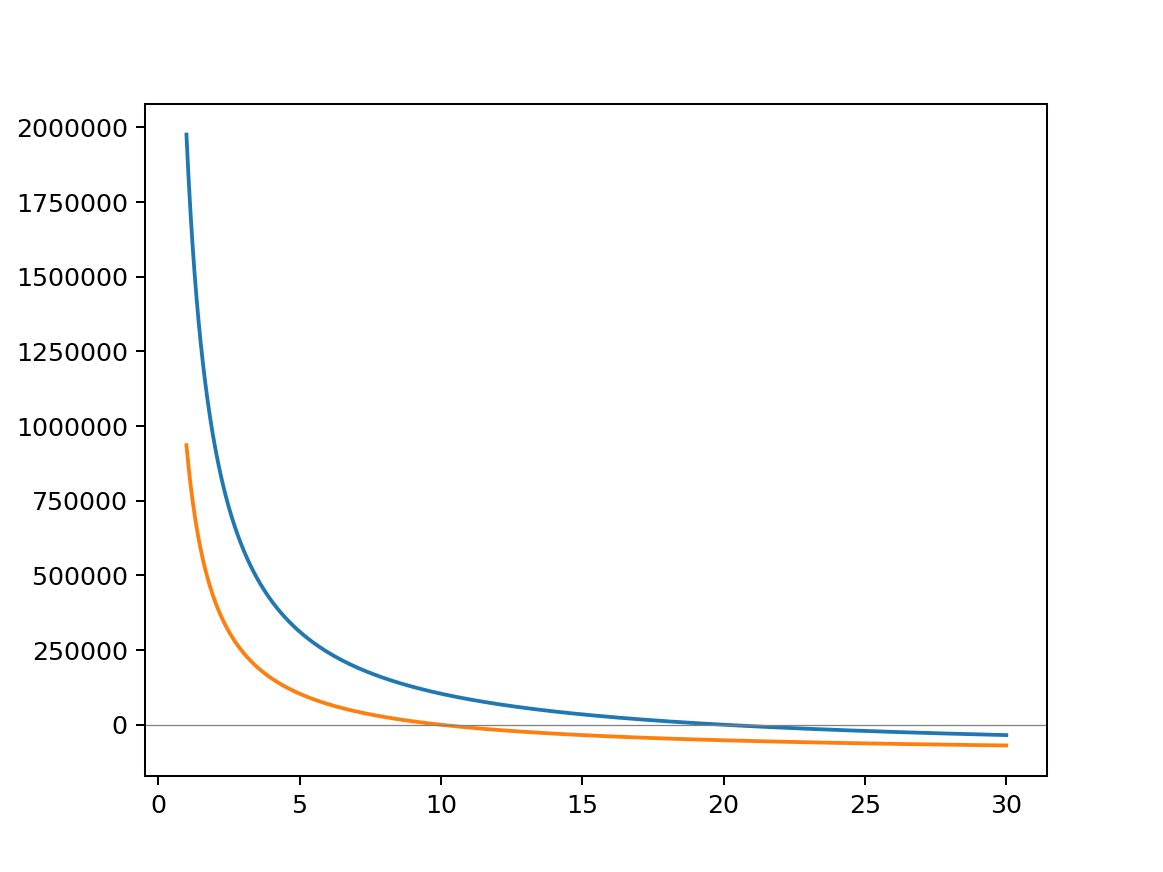

In [8]:
Z = 26
E_0 = 20 # keV


K = -4000
I = 1

E = energy_scale = np.linspace(.1,30,2048) #in keV
N_E = I*K*Z*(E-E_0)/E

Z2 = 26
E_02 = 10
N_E2 = I*K*Z2*(E-E_02)/E

plt.figure()
plt.plot(energy_scale, N_E);
plt.plot(energy_scale, N_E2);
plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5);

Please change the atomic number *Z* and the acceleration voltage *E_0* in the code cell 
above to see the influence of these values on the Bremsstrahlung.

## Bremsstrahlung and EDS Background

At low energies,  this background above does not look anything like the background we obtain in the EDS spectrum.

This is due to the  response of the EDS detector system

![X-Ray_Auger](./images_EDS/DetectorEfficiency.png).

The effect of the detector system will be discussed in the [Detector Efficiency notebook](CH4-Detector.ipynb). 

## Detector Response

The detector response $P_D$ is given by Small et al. as:
Here, we assume the contact to be Al and he dead layer is of course Si like the detector:
$$ P_D = (\exp(\mu_{Al}(E) *t_{Al} *\rho_{Al})) * (\exp(\mu_{Si}(E) *t_{dead layer} *\varrho_{Si} )) (1- \exp(\mu_{Si}(E) *t_{detector} *\varrho_{Si} )) $$

[ff.png](attachment:image.png)

In [16]:
#We make a linear energy scale 
energy_scale = np.linspace(.05,30,1199)

print(' The first ten energyenergy_scale[0:10])

[0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275]


In [15]:
from scipy.interpolate import interp1d
import scipy.constants as const
ni_density = 8.88  * 1e3 #g/cm**3 -> kg/m**3
gold_density = 19.3* 1e3 #g/cm**3 -> kg/m**3
al_density = 2.70  * 1e3 #g/cm**3 -> kg/m**3
si_density = 2.42  * 1e3 #g/cm**3 -> kg/m**3



nickelLayer = 0.* 1e-9
alLayer = 30 * 1e-9
goldLayer = 0.* 1e-9
deadLayer = 0.1* 1e-6
detector_thickness = 45 * 1e-3


niMassThickness = ni_density * nickelLayer; # in kg/cm^2 
goldMassThickness = gold_density * goldLayer;
alMassThickness = al_density * alLayer;
deadMassThickness = si_density  * deadLayer;
detMassThickness = si_density * detector_thickness;

area = 40
oo4pi = 1.0 / (4.0 * np.pi)

ffast_si = np.array(ffast_si) #cm^2/g
lin = interp1d(ffast_si[:,0],ffast_si[:,3],kind='linear') 
mac_si = lin(energy_scale) * 0.1 #m^2/kg

ffast_al = np.array(ffast_al)
lin = interp1d(ffast_al[:,0],ffast_al[:,3],kind='linear') 
mac_al = lin(energy_scale) * 0.1
print(const.e)


detector_Efficiency1 = np.exp(-mac_al * alMassThickness)* np.exp(-mac_si * deadMassThickness) 
detector_Efficiency2 = (1.0 - np.exp(-mac_si * detMassThickness))# * oo4pi;
detector_Efficiency =detector_Efficiency1 * detector_Efficiency2#* oo4pi;

Z = 26
E_0 = 30
E = energy_scale
N_E = 1*-4000*Z*(E-E_0)/E

P =  1.6561-0.11501*np.log(Z) 
n = E *(0.0739 -0.0051* np.log(Z)) + P
    
f = 1/( 1 + 1.2*1e-6*(E_0**1.65 -E**1.65) )
         
print(np.exp(0))
plt.figure()
plt.plot(energy_scale,detector_Efficiency1)
#plt.plot(energy_scale,N_E*detector_Efficiency)
#plt.plot(energy_scale,N_E)
#plt.ylim(-.0010,.002)

NameError: name 'ffast_si' is not defined

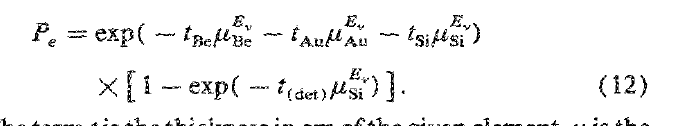

We use the [Mass Absorption Coefficients from Nist](https://physics.nist.gov/PhysRefData/FFast/html/form.html)

Select the element and as *Type of Data* select **Mass Photoabsorption Coefficient (cm^2/g)**

In [200]:
from pyTEMlib.config_dir import data_path
import pickle
pkl_file = open(data_path+'/edges_db.pkl', 'rb')

Xsections = pickle.load(pkl_file)
pkl_file.close()

print(Xsections['14'].keys())
print(Xsections['14']['dat'])




dict_keys(['name', 'barns', 'M1', 'L3', 'ene', 'L1', 'K1', 'dat', 'NumEdges', 'L2', 'M2'])
[2.52138817e+17 2.62487590e+17 3.23381651e+16 2.57282890e+16
 2.36310186e+16 2.31086830e+16 2.30718397e+16 2.29249329e+16
 2.13285449e+16 1.62432356e+16 1.18229712e+16 8.90348876e+15
 6.97691016e+15 5.71117927e+15 4.89083268e+15 4.37507299e+15
 4.07095246e+15 3.91523118e+15 3.86682187e+15 3.89163281e+15
 3.96317412e+15 4.06092548e+15 4.16884373e+15 4.27401039e+15
 4.36635185e+15 4.43821962e+15 4.48429708e+15 4.50131962e+15
 4.48798141e+15 4.44409590e+15 4.36784424e+15 4.26193138e+15
 4.13074122e+15 3.97893746e+15 3.81104390e+15 3.63116461e+15
 3.44317046e+15 3.25032605e+15 3.05556952e+15 2.86132600e+15
 2.66059992e+15 2.64017287e+15 2.58640029e+15 2.57226925e+15
 5.05079793e+16 5.07644833e+16 5.11282527e+16 5.23035076e+16
 5.24993835e+16 5.13194648e+16 4.90295832e+16 4.59226196e+16
 4.53946877e+16 4.45869331e+16 4.43696042e+16 4.86658138e+16
 4.78123549e+16 4.68469669e+16 4.28072613e+16 3.8673348

In [204]:
from pyTEMlib.config_dir import data_path

txtFile = open(data_path+'\XRPA\Si.dat', 'rb')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gduscher\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pyTEMlib\\data\\XRPA\\Si.dat'

In [202]:
#,E,f1,f2,[mu/rho],[sigma/rho],[mu/rho],[mu/rho]K,lambda ],
#,,,,Photoelectric,Coh+inc,Total ],,,
#,keV,e/atom,e/atom,cm2/g,cm2/g,cm2/g,cm2/g,nm,,g-1,cm2,g-1,cm2,g-1,nm

ffast_label = ['E [keV]', 'f1 [e/atom]',  'f2 [e/atom]','Photoelectric (mu/rho) [cm^2/g]' 
         ,'coh.+ Incoh. (mu/rho) [cm^2/g]' ,'total (mu/rho) [cm^2/g]' ,'(mu/rho)_K [cm^2/g]' , 'lambda [nm]']
ffast_si =[[4.98E-03,5.50E-01,0.00E+00,0.00E+00,2.11E-06,2.11E-06,0.00E+00,2.49E+02 ],
[5.06E-03,-3.21E-01,0.00E+00,0.00E+00,2.29E-06,2.29E-06,0.00E+00,2.45E+02 ],
[5.08E-03,-1.28E+00,0.00E+00,0.00E+00,2.35E-06,2.35E-06,0.00E+00,2.44E+02 ],
[5.11E-03,-4.08E-01,1.84E+00,5.41E+05,2.43E-06,5.41E+05,0.00E+00,2.43E+02 ],
[5.18E-03,3.20E-01,1.95E+00,5.63E+05,2.63E-06,5.63E+05,0.00E+00,2.39E+02 ],
[1.07E-02,4.49E+00,4.95E-01,6.93E+04,1.05E-04,6.93E+04,0.00E+00,1.16E+02 ],
[1.11E-02,4.42E+00,4.10E-01,5.52E+04,1.27E-04,5.52E+04,0.00E+00,1.11E+02 ],
[1.13E-02,4.38E+00,3.82E-01,5.07E+04,1.36E-04,5.07E+04,0.00E+00,1.10E+02 ],
[1.13E-02,4.37E+00,3.75E-01,4.96E+04,1.38E-04,4.96E+04,0.00E+00,1.09E+02 ],
[1.14E-02,4.37E+00,3.77E-01,4.95E+04,1.42E-04,4.95E+04,0.00E+00,1.09E+02 ],
[1.14E-02,4.37E+00,3.75E-01,4.92E+04,1.43E-04,4.92E+04,0.00E+00,1.09E+02 ],
[1.16E-02,4.35E+00,3.54E-01,4.57E+04,1.52E-04,4.57E+04,0.00E+00,1.07E+02 ],
[1.22E-02,4.27E+00,2.84E-01,3.48E+04,1.93E-04,3.48E+04,0.00E+00,1.02E+02 ],
[1.31E-02,4.18E+00,2.21E-01,2.54E+04,2.59E-04,2.54E+04,0.00E+00,9.49E+01 ],
[1.40E-02,4.09E+00,1.78E-01,1.91E+04,3.47E-04,1.91E+04,0.00E+00,8.88E+01 ],
[1.49E-02,4.02E+00,1.49E-01,1.50E+04,4.61E-04,1.50E+04,0.00E+00,8.31E+01 ],
[1.60E-02,3.96E+00,1.30E-01,1.22E+04,6.09E-04,1.22E+04,0.00E+00,7.77E+01 ],
[1.71E-02,3.90E+00,1.19E-01,1.05E+04,8.01E-04,1.05E+04,0.00E+00,7.27E+01 ],
[1.82E-02,3.85E+00,1.14E-01,9.38E+03,1.05E-03,9.38E+03,0.00E+00,6.80E+01 ],
[1.95E-02,3.80E+00,1.14E-01,8.73E+03,1.36E-03,8.73E+03,0.00E+00,6.36E+01 ],
[2.08E-02,3.76E+00,1.17E-01,8.40E+03,1.76E-03,8.40E+03,0.00E+00,5.95E+01 ],
[2.23E-02,3.71E+00,1.23E-01,8.29E+03,2.27E-03,8.29E+03,0.00E+00,5.57E+01 ],
[2.38E-02,3.67E+00,1.33E-01,8.34E+03,2.91E-03,8.34E+03,0.00E+00,5.21E+01 ],
[2.55E-02,3.64E+00,1.44E-01,8.50E+03,3.70E-03,8.50E+03,0.00E+00,4.87E+01 ],
[2.72E-02,3.60E+00,1.58E-01,8.71E+03,4.69E-03,8.71E+03,0.00E+00,4.56E+01 ],
[2.91E-02,3.56E+00,1.74E-01,8.94E+03,5.92E-03,8.94E+03,0.00E+00,4.26E+01 ],
[3.11E-02,3.52E+00,1.90E-01,9.16E+03,7.43E-03,9.16E+03,0.00E+00,3.99E+01 ],
[3.32E-02,3.48E+00,2.08E-01,9.36E+03,9.27E-03,9.36E+03,0.00E+00,3.73E+01 ],
[3.55E-02,3.43E+00,2.26E-01,9.52E+03,1.15E-02,9.52E+03,0.00E+00,3.49E+01 ],
[3.80E-02,3.39E+00,2.44E-01,9.62E+03,1.42E-02,9.62E+03,0.00E+00,3.26E+01 ],
[4.06E-02,3.33E+00,2.62E-01,9.65E+03,1.75E-02,9.65E+03,0.00E+00,3.05E+01 ],
[4.34E-02,3.27E+00,2.79E-01,9.62E+03,2.14E-02,9.62E+03,0.00E+00,2.86E+01 ],
[4.64E-02,3.20E+00,2.95E-01,9.53E+03,2.61E-02,9.53E+03,0.00E+00,2.67E+01 ],
[4.96E-02,3.11E+00,3.10E-01,9.37E+03,3.17E-02,9.37E+03,0.00E+00,2.50E+01 ],
[5.30E-02,3.01E+00,3.23E-01,9.14E+03,3.82E-02,9.14E+03,0.00E+00,2.34E+01 ],
[5.67E-02,2.88E+00,3.35E-01,8.86E+03,4.59E-02,8.86E+03,0.00E+00,2.19E+01 ],
[6.06E-02,2.72E+00,3.45E-01,8.53E+03,5.48E-02,8.53E+03,0.00E+00,2.05E+01 ],
[6.48E-02,2.51E+00,3.53E-01,8.17E+03,6.52E-02,8.17E+03,0.00E+00,1.91E+01 ],
[6.92E-02,2.25E+00,3.60E-01,7.79E+03,7.72E-02,7.79E+03,0.00E+00,1.79E+01 ],
[7.40E-02,1.91E+00,3.65E-01,7.38E+03,9.11E-02,7.38E+03,0.00E+00,1.68E+01 ],
[7.91E-02,1.43E+00,3.68E-01,6.97E+03,1.07E-01,6.97E+03,0.00E+00,1.57E+01 ],
[8.46E-02,7.37E-01,3.70E-01,6.55E+03,1.25E-01,6.55E+03,0.00E+00,1.47E+01 ],
[9.04E-02,-4.23E-01,3.70E-01,6.14E+03,1.45E-01,6.14E+03,0.00E+00,1.37E+01 ],
[9.67E-02,-3.28E+00,3.68E-01,5.70E+03,1.68E-01,5.71E+03,0.00E+00,1.28E+01 ],
[9.72E-02,-3.85E+00,3.67E-01,5.66E+03,1.70E-01,5.66E+03,0.00E+00,1.28E+01 ],
[9.87E-02,-6.95E+00,3.65E-01,5.55E+03,1.76E-01,5.55E+03,0.00E+00,1.26E+01 ],
[9.91E-02,-1.05E+01,3.65E-01,5.52E+03,1.77E-01,5.52E+03,0.00E+00,1.25E+01 ],
[9.97E-02,-7.08E+00,7.21E+00,1.08E+05,1.80E-01,1.08E+05,0.00E+00,1.24E+01 ],
[1.01E-01,-4.18E+00,7.35E+00,1.09E+05,1.85E-01,1.09E+05,0.00E+00,1.23E+01 ],
[1.03E-01,-2.67E+00,7.56E+00,1.10E+05,1.94E-01,1.10E+05,0.00E+00,1.20E+01 ],
[1.10E-01,-4.73E-01,8.27E+00,1.12E+05,2.22E-01,1.12E+05,0.00E+00,1.12E+01 ],
[1.18E-01,1.03E+00,8.87E+00,1.13E+05,2.54E-01,1.13E+05,0.00E+00,1.05E+01 ],
[1.26E-01,2.35E+00,9.27E+00,1.10E+05,2.89E-01,1.10E+05,0.00E+00,9.82E+00 ],
[1.35E-01,3.52E+00,9.47E+00,1.05E+05,3.27E-01,1.05E+05,0.00E+00,9.19E+00 ],
[1.44E-01,4.40E+00,9.48E+00,9.85E+04,3.69E-01,9.85E+04,0.00E+00,8.60E+00 ],
[1.46E-01,4.45E+00,9.47E+00,9.73E+04,3.76E-01,9.73E+04,0.00E+00,8.51E+00 ],
[1.48E-01,4.27E+00,9.44E+00,9.56E+04,3.86E-01,9.56E+04,0.00E+00,8.38E+00 ],
[1.49E-01,3.84E+00,9.43E+00,9.51E+04,3.89E-01,9.51E+04,0.00E+00,8.35E+00 ],
[1.49E-01,4.44E+00,1.04E+01,1.04E+05,3.93E-01,1.04E+05,0.00E+00,8.30E+00 ],
[1.52E-01,5.12E+00,1.04E+01,1.03E+05,4.03E-01,1.03E+05,0.00E+00,8.17E+00 ],
[1.54E-01,5.58E+00,1.03E+01,1.00E+05,4.15E-01,1.00E+05,0.00E+00,8.04E+00 ],
[1.65E-01,6.96E+00,1.01E+01,9.18E+04,4.64E-01,9.18E+04,0.00E+00,7.52E+00 ],
[1.76E-01,8.06E+00,9.75E+00,8.29E+04,5.17E-01,8.29E+04,0.00E+00,7.04E+00 ],
[1.88E-01,9.01E+00,9.33E+00,7.42E+04,5.73E-01,7.42E+04,0.00E+00,6.58E+00 ],
[2.01E-01,9.82E+00,8.84E+00,6.58E+04,6.33E-01,6.58E+04,0.00E+00,6.16E+00 ],
[2.15E-01,1.05E+01,8.32E+00,5.79E+04,6.97E-01,5.79E+04,0.00E+00,5.76E+00 ],
[2.30E-01,1.11E+01,7.79E+00,5.07E+04,7.64E-01,5.07E+04,0.00E+00,5.39E+00 ],
[2.46E-01,1.16E+01,7.25E+00,4.42E+04,8.34E-01,4.42E+04,0.00E+00,5.04E+00 ],
[2.63E-01,1.20E+01,6.72E+00,3.83E+04,9.07E-01,3.83E+04,0.00E+00,4.72E+00 ],
[2.81E-01,1.23E+01,6.21E+00,3.31E+04,9.82E-01,3.31E+04,0.00E+00,4.41E+00 ],
[3.01E-01,1.26E+01,5.72E+00,2.85E+04,1.06E+00,2.85E+04,0.00E+00,4.13E+00 ],
[3.21E-01,1.28E+01,5.25E+00,2.45E+04,1.14E+00,2.45E+04,0.00E+00,3.86E+00 ],
[3.43E-01,1.29E+01,4.81E+00,2.10E+04,1.22E+00,2.10E+04,0.00E+00,3.61E+00 ],
[3.67E-01,1.31E+01,4.40E+00,1.79E+04,1.30E+00,1.79E+04,0.00E+00,3.38E+00 ],
[3.92E-01,1.32E+01,4.01E+00,1.53E+04,1.38E+00,1.53E+04,0.00E+00,3.16E+00 ],
[4.20E-01,1.32E+01,3.66E+00,1.31E+04,1.47E+00,1.31E+04,0.00E+00,2.96E+00 ],
[4.48E-01,1.33E+01,3.33E+00,1.11E+04,1.55E+00,1.11E+04,0.00E+00,2.77E+00 ],
[4.79E-01,1.33E+01,3.02E+00,9.44E+03,1.63E+00,9.44E+03,0.00E+00,2.59E+00 ],
[5.12E-01,1.33E+01,2.74E+00,8.01E+03,1.70E+00,8.01E+03,0.00E+00,2.42E+00 ],
[5.48E-01,1.33E+01,2.48E+00,6.78E+03,1.78E+00,6.78E+03,0.00E+00,2.26E+00 ],
[5.86E-01,1.33E+01,2.24E+00,5.74E+03,1.85E+00,5.74E+03,0.00E+00,2.12E+00 ],
[6.26E-01,1.32E+01,2.03E+00,4.85E+03,1.92E+00,4.86E+03,0.00E+00,1.98E+00 ],
[6.69E-01,1.32E+01,1.83E+00,4.10E+03,1.98E+00,4.10E+03,0.00E+00,1.85E+00 ],
[7.15E-01,1.32E+01,1.65E+00,3.46E+03,2.04E+00,3.46E+03,0.00E+00,1.73E+00 ],
[7.65E-01,1.31E+01,1.49E+00,2.92E+03,2.09E+00,2.92E+03,0.00E+00,1.62E+00 ],
[8.18E-01,1.31E+01,1.34E+00,2.46E+03,2.14E+00,2.46E+03,0.00E+00,1.52E+00 ],
[8.74E-01,1.30E+01,1.21E+00,2.07E+03,2.18E+00,2.08E+03,0.00E+00,1.42E+00 ],
[9.34E-01,1.29E+01,1.09E+00,1.75E+03,2.22E+00,1.75E+03,0.00E+00,1.33E+00 ],
[9.99E-01,1.29E+01,9.81E-01,1.47E+03,2.25E+00,1.47E+03,0.00E+00,1.24E+00 ],
[1.07E+00,1.28E+01,8.71E-01,1.22E+03,2.27E+00,1.23E+03,0.00E+00,1.16E+00 ],
[1.14E+00,1.27E+01,7.74E-01,1.02E+03,2.29E+00,1.02E+03,0.00E+00,1.09E+00 ],
[1.22E+00,1.26E+01,6.89E-01,8.45E+02,2.30E+00,8.48E+02,0.00E+00,1.02E+00 ],
[1.30E+00,1.25E+01,6.13E-01,7.04E+02,2.30E+00,7.06E+02,0.00E+00,9.51E-01 ],
[1.39E+00,1.23E+01,5.46E-01,5.87E+02,2.29E+00,5.89E+02,0.00E+00,8.89E-01 ],
[1.49E+00,1.21E+01,4.87E-01,4.90E+02,2.28E+00,4.92E+02,0.00E+00,8.32E-01 ],
[1.59E+00,1.17E+01,4.35E-01,4.09E+02,2.26E+00,4.11E+02,0.00E+00,7.78E-01 ],
[1.70E+00,1.12E+01,3.88E-01,3.42E+02,2.24E+00,3.44E+02,0.00E+00,7.28E-01 ],
[1.80E+00,9.77E+00,3.53E-01,2.94E+02,2.21E+00,2.96E+02,0.00E+00,6.88E-01 ],
[1.82E+00,8.97E+00,3.47E-01,2.86E+02,2.21E+00,2.88E+02,0.00E+00,6.81E-01 ],
[1.83E+00,8.18E+00,3.44E-01,2.82E+02,2.20E+00,2.84E+02,0.00E+00,6.78E-01 ],
[1.84E+00,6.28E+00,3.42E-01,2.79E+02,2.20E+00,2.81E+02,0.00E+00,6.75E-01 ],
[1.85E+00,8.18E+00,4.08E+00,3.31E+03,2.20E+00,3.31E+03,3.04E+03,6.71E-01 ],
[1.88E+00,9.91E+00,4.03E+00,3.22E+03,2.19E+00,3.22E+03,2.96E+03,6.61E-01 ],
[1.95E+00,1.14E+01,3.89E+00,2.99E+03,2.17E+00,3.00E+03,2.76E+03,6.37E-01 ],
[2.08E+00,1.25E+01,3.53E+00,2.54E+03,2.13E+00,2.54E+03,2.34E+03,5.96E-01 ],
[2.22E+00,1.31E+01,3.16E+00,2.13E+03,2.08E+00,2.13E+03,1.96E+03,5.57E-01 ],
[2.38E+00,1.35E+01,2.82E+00,1.78E+03,2.03E+00,1.78E+03,1.64E+03,5.21E-01 ],
[2.54E+00,1.38E+01,2.53E+00,1.49E+03,1.98E+00,1.49E+03,1.38E+03,4.88E-01 ],
[2.72E+00,1.40E+01,2.28E+00,1.26E+03,1.92E+00,1.26E+03,1.16E+03,4.56E-01 ],
[2.90E+00,1.41E+01,2.05E+00,1.06E+03,1.86E+00,1.06E+03,9.74E+02,4.27E-01 ],
[3.11E+00,1.42E+01,1.83E+00,8.84E+02,1.80E+00,8.86E+02,8.17E+02,3.99E-01 ],
[3.32E+00,1.43E+01,1.64E+00,7.39E+02,1.73E+00,7.40E+02,6.84E+02,3.74E-01 ],
[3.55E+00,1.43E+01,1.46E+00,6.17E+02,1.66E+00,6.19E+02,5.72E+02,3.49E-01 ],
[3.79E+00,1.44E+01,1.30E+00,5.13E+02,1.60E+00,5.15E+02,4.76E+02,3.27E-01 ],
[4.06E+00,1.44E+01,1.15E+00,4.25E+02,1.53E+00,4.27E+02,3.95E+02,3.06E-01 ],
[4.33E+00,1.44E+01,1.02E+00,3.52E+02,1.46E+00,3.54E+02,3.27E+02,2.86E-01 ],
[4.63E+00,1.44E+01,9.02E-01,2.92E+02,1.39E+00,2.93E+02,2.71E+02,2.68E-01 ],
[4.95E+00,1.44E+01,7.99E-01,2.42E+02,1.33E+00,2.43E+02,2.24E+02,2.50E-01 ],
[5.30E+00,1.44E+01,7.07E-01,2.00E+02,1.26E+00,2.01E+02,1.86E+02,2.34E-01 ],
[5.66E+00,1.44E+01,6.26E-01,1.66E+02,1.20E+00,1.67E+02,1.54E+02,2.19E-01 ],
[6.05E+00,1.43E+01,5.55E-01,1.37E+02,1.13E+00,1.38E+02,1.28E+02,2.05E-01 ],
[6.47E+00,1.43E+01,4.91E-01,1.14E+02,1.07E+00,1.15E+02,1.06E+02,1.92E-01 ],
[6.92E+00,1.43E+01,4.35E-01,9.43E+01,1.01E+00,9.53E+01,8.76E+01,1.79E-01 ],
[7.39E+00,1.43E+01,3.85E-01,7.81E+01,9.56E-01,7.91E+01,7.26E+01,1.68E-01 ],
[7.90E+00,1.43E+01,3.41E-01,6.47E+01,9.00E-01,6.56E+01,6.02E+01,1.57E-01 ],
[8.45E+00,1.43E+01,3.01E-01,5.33E+01,8.48E-01,5.42E+01,4.96E+01,1.47E-01 ],
[9.03E+00,1.42E+01,2.64E-01,4.38E+01,7.98E-01,4.46E+01,4.07E+01,1.37E-01 ],
[9.65E+00,1.42E+01,2.31E-01,3.58E+01,7.50E-01,3.65E+01,3.33E+01,1.28E-01 ],
[1.03E+01,1.42E+01,2.01E-01,2.92E+01,7.05E-01,2.99E+01,2.72E+01,1.20E-01 ],
[1.10E+01,1.42E+01,1.76E-01,2.39E+01,6.62E-01,2.45E+01,2.22E+01,1.12E-01 ],
[1.18E+01,1.42E+01,1.54E-01,1.95E+01,6.22E-01,2.01E+01,1.81E+01,1.05E-01 ],
[1.26E+01,1.42E+01,1.34E-01,1.59E+01,5.84E-01,1.65E+01,1.48E+01,9.83E-02 ],
[1.35E+01,1.41E+01,1.17E-01,1.30E+01,5.49E-01,1.36E+01,1.21E+01,9.20E-02 ],
[1.44E+01,1.41E+01,1.02E-01,1.06E+01,5.16E-01,1.12E+01,9.88E+00,8.61E-02 ],
[1.54E+01,1.41E+01,8.93E-02,8.69E+00,4.85E-01,9.17E+00,8.07E+00,8.05E-02 ],
[1.65E+01,1.41E+01,7.80E-02,7.10E+00,4.56E-01,7.55E+00,6.60E+00,7.53E-02 ],
[1.76E+01,1.41E+01,6.81E-02,5.80E+00,4.30E-01,6.23E+00,5.39E+00,7.05E-02 ],
[1.88E+01,1.41E+01,5.95E-02,4.74E+00,4.06E-01,5.14E+00,4.40E+00,6.59E-02 ],
[2.01E+01,1.41E+01,5.20E-02,3.87E+00,3.83E-01,4.25E+00,3.60E+00,6.17E-02 ],
[2.15E+01,1.41E+01,4.54E-02,3.16E+00,3.62E-01,3.52E+00,2.94E+00,5.77E-02 ],
[2.30E+01,1.41E+01,3.96E-02,2.58E+00,3.43E-01,2.93E+00,2.40E+00,5.40E-02 ],
[2.46E+01,1.41E+01,3.46E-02,2.11E+00,3.26E-01,2.44E+00,1.96E+00,5.05E-02 ],
[2.63E+01,1.41E+01,3.02E-02,1.72E+00,3.09E-01,2.03E+00,1.60E+00,4.72E-02 ],
[2.81E+01,1.40E+01,2.63E-02,1.40E+00,2.95E-01,1.70E+00,1.30E+00,4.42E-02 ],
[3.00E+01,1.40E+01,2.28E-02,1.14E+00,2.81E-01,1.42E+00,1.06E+00,4.13E-02 ],
[3.21E+01,1.40E+01,1.98E-02,9.24E-01,2.69E-01,1.19E+00,8.58E-01,3.86E-02 ],
[3.43E+01,1.40E+01,1.72E-02,7.50E-01,2.58E-01,1.01E+00,6.97E-01,3.62E-02 ],
[3.67E+01,1.40E+01,1.49E-02,6.08E-01,2.47E-01,8.56E-01,5.65E-01,3.38E-02 ],
[3.92E+01,1.40E+01,1.29E-02,4.94E-01,2.38E-01,7.32E-01,4.59E-01,3.16E-02 ],
[4.19E+01,1.40E+01,1.12E-02,3.99E-01,2.29E-01,6.28E-01,3.71E-01,2.96E-02 ],
[4.48E+01,1.40E+01,9.64E-03,3.22E-01,2.21E-01,5.44E-01,3.00E-01,2.77E-02 ],
[4.79E+01,1.40E+01,8.33E-03,2.61E-01,2.14E-01,4.75E-01,2.42E-01,2.59E-02 ],
[5.12E+01,1.40E+01,7.19E-03,2.11E-01,2.07E-01,4.18E-01,1.96E-01,2.42E-02 ],
[5.47E+01,1.40E+01,6.21E-03,1.70E-01,2.01E-01,3.71E-01,1.58E-01,2.27E-02 ],
[5.85E+01,1.40E+01,5.37E-03,1.37E-01,1.95E-01,3.33E-01,1.28E-01,2.12E-02 ]]

ffast_al = [[8.21E-03,3.12E+00,0.00E+00,0.00E+00,3.61E-05,3.61E-05,0.00E+00,1.51E+02],
[8.33E-03,3.08E+00,0.00E+00,0.00E+00,3.88E-05,3.88E-05,0.00E+00,1.49E+02],
[8.37E-03,3.03E+00,0.00E+00,0.00E+00,3.96E-05,3.96E-05,0.00E+00,1.48E+02],
[8.42E-03,3.09E+00,1.03E-01,1.91E+04,4.08E-05,1.91E+04,0.00E+00,1.47E+02],
[8.54E-03,3.14E+00,9.05E-02,1.65E+04,4.38E-05,1.65E+04,0.00E+00,1.45E+02],
[1.07E-02,3.17E+00,1.84E-02,2.68E+03,1.25E-04,2.68E+03,0.00E+00,1.16E+02],
[1.14E-02,3.16E+00,1.51E-02,2.05E+03,1.69E-04,2.05E+03,0.00E+00,1.09E+02],
[1.22E-02,3.14E+00,1.37E-02,1.74E+03,2.26E-04,1.74E+03,0.00E+00,1.02E+02],
[1.31E-02,3.13E+00,1.35E-02,1.61E+03,3.02E-04,1.61E+03,0.00E+00,9.49E+01],
[1.40E-02,3.12E+00,1.42E-02,1.59E+03,4.01E-04,1.59E+03,0.00E+00,8.88E+01],
[1.49E-02,3.10E+00,1.57E-02,1.65E+03,5.30E-04,1.65E+03,0.00E+00,8.31E+01],
[1.60E-02,3.09E+00,1.81E-02,1.77E+03,6.96E-04,1.77E+03,0.00E+00,7.77E+01],
[1.71E-02,3.07E+00,2.15E-02,1.96E+03,9.10E-04,1.96E+03,0.00E+00,7.27E+01],
[1.82E-02,3.04E+00,2.59E-02,2.22E+03,1.18E-03,2.22E+03,0.00E+00,6.80E+01],
[1.95E-02,3.02E+00,3.15E-02,2.52E+03,1.53E-03,2.52E+03,0.00E+00,6.36E+01],
[2.08E-02,2.99E+00,3.86E-02,2.89E+03,1.97E-03,2.89E+03,0.00E+00,5.95E+01],
[2.23E-02,2.96E+00,4.71E-02,3.30E+03,2.52E-03,3.30E+03,0.00E+00,5.57E+01],
[2.38E-02,2.93E+00,5.72E-02,3.75E+03,3.21E-03,3.75E+03,0.00E+00,5.21E+01],
[2.55E-02,2.89E+00,6.88E-02,4.22E+03,4.07E-03,4.22E+03,0.00E+00,4.87E+01],
[2.72E-02,2.85E+00,8.18E-02,4.69E+03,5.13E-03,4.69E+03,0.00E+00,4.56E+01],
[2.91E-02,2.81E+00,9.59E-02,5.14E+03,6.43E-03,5.14E+03,0.00E+00,4.26E+01],
[3.11E-02,2.75E+00,1.11E-01,5.56E+03,8.03E-03,5.56E+03,0.00E+00,3.99E+01],
[3.32E-02,2.69E+00,1.26E-01,5.90E+03,9.97E-03,5.90E+03,0.00E+00,3.73E+01],
[3.55E-02,2.63E+00,1.40E-01,6.16E+03,1.23E-02,6.16E+03,0.00E+00,3.49E+01],
[3.80E-02,2.55E+00,1.54E-01,6.31E+03,1.52E-02,6.31E+03,0.00E+00,3.26E+01],
[4.06E-02,2.45E+00,1.65E-01,6.33E+03,1.86E-02,6.33E+03,0.00E+00,3.05E+01],
[4.34E-02,2.33E+00,1.74E-01,6.26E+03,2.26E-02,6.26E+03,0.00E+00,2.86E+01],
[4.64E-02,2.19E+00,1.81E-01,6.10E+03,2.74E-02,6.10E+03,0.00E+00,2.67E+01],
[4.96E-02,2.00E+00,1.86E-01,5.85E+03,3.31E-02,5.85E+03,0.00E+00,2.50E+01],
[5.30E-02,1.76E+00,1.88E-01,5.54E+03,3.97E-02,5.54E+03,0.00E+00,2.34E+01],
[5.67E-02,1.45E+00,1.88E-01,5.18E+03,4.75E-02,5.18E+03,0.00E+00,2.19E+01],
[6.06E-02,1.01E+00,1.86E-01,4.80E+03,5.66E-02,4.80E+03,0.00E+00,2.05E+01],
[6.48E-02,3.50E-01,1.83E-01,4.40E+03,6.70E-02,4.40E+03,0.00E+00,1.91E+01],
[6.92E-02,-8.56E-01,1.78E-01,4.01E+03,7.90E-02,4.01E+03,0.00E+00,1.79E+01],
[7.16E-02,-2.26E+00,1.75E-01,3.81E+03,8.58E-02,3.81E+03,0.00E+00,1.73E+01],
[7.27E-02,-4.07E+00,1.74E-01,3.73E+03,8.90E-02,3.73E+03,0.00E+00,1.71E+01],
[7.30E-02,-6.03E+00,1.73E-01,3.70E+03,8.98E-02,3.70E+03,0.00E+00,1.70E+01],
[7.35E-02,-4.25E+00,3.93E+00,8.34E+04,9.11E-02,8.34E+04,0.00E+00,1.69E+01],
[7.40E-02,-3.27E+00,4.01E+00,8.46E+04,9.27E-02,8.46E+04,0.00E+00,1.68E+01],
[7.46E-02,-2.80E+00,4.10E+00,8.58E+04,9.44E-02,8.58E+04,0.00E+00,1.66E+01],
[7.91E-02,-1.53E+00,4.89E+00,9.63E+04,1.08E-01,9.63E+04,0.00E+00,1.57E+01],
[8.46E-02,-8.05E-01,5.88E+00,1.08E+05,1.26E-01,1.08E+05,0.00E+00,1.47E+01],
[9.04E-02,-1.07E-02,6.78E+00,1.17E+05,1.46E-01,1.17E+05,0.00E+00,1.37E+01],
[9.67E-02,8.82E-01,7.52E+00,1.21E+05,1.68E-01,1.21E+05,0.00E+00,1.28E+01],
[1.03E-01,1.83E+00,8.07E+00,1.22E+05,1.93E-01,1.22E+05,0.00E+00,1.20E+01],
[1.10E-01,2.73E+00,8.42E+00,1.19E+05,2.21E-01,1.19E+05,0.00E+00,1.12E+01],
[1.15E-01,3.13E+00,8.54E+00,1.15E+05,2.41E-01,1.15E+05,0.00E+00,1.08E+01],
[1.17E-01,3.00E+00,8.56E+00,1.14E+05,2.48E-01,1.14E+05,0.00E+00,1.06E+01],
[1.18E-01,2.62E+00,8.57E+00,1.14E+05,2.50E-01,1.14E+05,0.00E+00,1.05E+01],
[1.18E-01,3.00E+00,9.42E+00,1.24E+05,2.52E-01,1.24E+05,0.00E+00,1.05E+01],
[1.18E-01,3.15E+00,9.42E+00,1.24E+05,2.53E-01,1.24E+05,0.00E+00,1.05E+01],
[1.20E-01,3.75E+00,9.44E+00,1.23E+05,2.60E-01,1.23E+05,0.00E+00,1.03E+01],
[1.26E-01,4.87E+00,9.44E+00,1.17E+05,2.86E-01,1.17E+05,0.00E+00,9.82E+00],
[1.35E-01,6.04E+00,9.31E+00,1.08E+05,3.22E-01,1.08E+05,0.00E+00,9.19E+00],
[1.44E-01,7.06E+00,9.06E+00,9.80E+04,3.62E-01,9.80E+04,0.00E+00,8.60E+00],
[1.54E-01,7.95E+00,8.71E+00,8.81E+04,4.06E-01,8.81E+04,0.00E+00,8.04E+00],
[1.65E-01,8.73E+00,8.30E+00,7.85E+04,4.52E-01,7.85E+04,0.00E+00,7.52E+00],
[1.76E-01,9.39E+00,7.84E+00,6.94E+04,5.02E-01,6.94E+04,0.00E+00,7.04E+00],
[1.88E-01,9.96E+00,7.35E+00,6.09E+04,5.56E-01,6.09E+04,0.00E+00,6.58E+00],
[2.01E-01,1.04E+01,6.86E+00,5.32E+04,6.12E-01,5.32E+04,0.00E+00,6.16E+00],
[2.15E-01,1.08E+01,6.38E+00,4.62E+04,6.72E-01,4.62E+04,0.00E+00,5.76E+00],
[2.30E-01,1.11E+01,5.90E+00,4.00E+04,7.34E-01,4.00E+04,0.00E+00,5.39E+00],
[2.46E-01,1.14E+01,5.45E+00,3.45E+04,7.99E-01,3.45E+04,0.00E+00,5.04E+00],
[2.63E-01,1.16E+01,5.01E+00,2.97E+04,8.67E-01,2.97E+04,0.00E+00,4.72E+00],
[2.81E-01,1.18E+01,4.60E+00,2.55E+04,9.36E-01,2.55E+04,0.00E+00,4.41E+00],
[3.01E-01,1.19E+01,4.22E+00,2.19E+04,1.01E+00,2.19E+04,0.00E+00,4.13E+00],
[3.21E-01,1.20E+01,3.86E+00,1.87E+04,1.08E+00,1.87E+04,0.00E+00,3.86E+00],
[3.43E-01,1.21E+01,3.52E+00,1.60E+04,1.15E+00,1.60E+04,0.00E+00,3.61E+00],
[3.67E-01,1.21E+01,3.21E+00,1.36E+04,1.23E+00,1.36E+04,0.00E+00,3.38E+00],
[3.92E-01,1.22E+01,2.92E+00,1.16E+04,1.30E+00,1.16E+04,0.00E+00,3.16E+00],
[4.20E-01,1.22E+01,2.66E+00,9.88E+03,1.38E+00,9.88E+03,0.00E+00,2.96E+00],
[4.48E-01,1.22E+01,2.41E+00,8.39E+03,1.45E+00,8.39E+03,0.00E+00,2.77E+00],
[4.79E-01,1.22E+01,2.19E+00,7.12E+03,1.52E+00,7.12E+03,0.00E+00,2.59E+00],
[5.12E-01,1.21E+01,1.98E+00,6.03E+03,1.59E+00,6.03E+03,0.00E+00,2.42E+00],
[5.48E-01,1.21E+01,1.79E+00,5.10E+03,1.66E+00,5.10E+03,0.00E+00,2.26E+00],
[5.86E-01,1.21E+01,1.62E+00,4.31E+03,1.72E+00,4.31E+03,0.00E+00,2.12E+00],
[6.26E-01,1.20E+01,1.46E+00,3.64E+03,1.78E+00,3.65E+03,0.00E+00,1.98E+00],
[6.69E-01,1.20E+01,1.32E+00,3.08E+03,1.84E+00,3.08E+03,0.00E+00,1.85E+00],
[7.15E-01,1.19E+01,1.19E+00,2.59E+03,1.89E+00,2.60E+03,0.00E+00,1.73E+00],
[7.65E-01,1.19E+01,1.07E+00,2.19E+03,1.93E+00,2.19E+03,0.00E+00,1.62E+00],
[8.18E-01,1.18E+01,9.67E-01,1.84E+03,1.97E+00,1.85E+03,0.00E+00,1.52E+00],
[8.74E-01,1.17E+01,8.71E-01,1.55E+03,2.01E+00,1.56E+03,0.00E+00,1.42E+00],
[9.34E-01,1.16E+01,7.85E-01,1.31E+03,2.04E+00,1.31E+03,0.00E+00,1.33E+00],
[9.99E-01,1.15E+01,7.07E-01,1.10E+03,2.06E+00,1.11E+03,0.00E+00,1.24E+00],
[1.07E+00,1.14E+01,6.29E-01,9.19E+02,2.08E+00,9.21E+02,0.00E+00,1.16E+00],
[1.14E+00,1.13E+01,5.60E-01,7.65E+02,2.09E+00,7.67E+02,0.00E+00,1.09E+00],
[1.22E+00,1.11E+01,4.99E-01,6.38E+02,2.10E+00,6.40E+02,0.00E+00,1.02E+00],
[1.30E+00,1.09E+01,4.45E-01,5.32E+02,2.10E+00,5.35E+02,0.00E+00,9.51E-01],
[1.39E+00,1.04E+01,3.97E-01,4.44E+02,2.09E+00,4.46E+02,0.00E+00,8.89E-01],
[1.49E+00,9.55E+00,3.53E-01,3.69E+02,2.08E+00,3.71E+02,0.00E+00,8.32E-01],
[1.53E+00,8.68E+00,3.38E-01,3.45E+02,2.07E+00,3.47E+02,0.00E+00,8.11E-01],
[1.55E+00,7.08E+00,3.29E-01,3.31E+02,2.06E+00,3.33E+02,0.00E+00,7.99E-01],
[1.56E+00,5.18E+00,3.27E-01,3.27E+02,2.06E+00,3.29E+02,0.00E+00,7.96E-01],
[1.57E+00,7.06E+00,4.06E+00,4.04E+03,2.06E+00,4.04E+03,3.71E+03,7.91E-01],
[1.59E+00,8.77E+00,4.03E+00,3.95E+03,2.06E+00,3.96E+03,3.65E+03,7.79E-01],
[1.59E+00,8.87E+00,4.03E+00,3.95E+03,2.06E+00,3.95E+03,3.64E+03,7.78E-01],
[1.70E+00,1.09E+01,3.80E+00,3.48E+03,2.03E+00,3.49E+03,3.23E+03,7.28E-01],
[1.82E+00,1.18E+01,3.43E+00,2.94E+03,2.00E+00,2.94E+03,2.73E+03,6.81E-01],
[1.95E+00,1.23E+01,3.05E+00,2.45E+03,1.97E+00,2.45E+03,2.27E+03,6.37E-01],
[2.08E+00,1.26E+01,2.71E+00,2.03E+03,1.93E+00,2.04E+03,1.88E+03,5.96E-01],
[2.22E+00,1.29E+01,2.43E+00,1.70E+03,1.88E+00,1.71E+03,1.58E+03,5.57E-01],
[2.38E+00,1.30E+01,2.18E+00,1.43E+03,1.84E+00,1.43E+03,1.33E+03,5.21E-01],
[2.54E+00,1.31E+01,1.96E+00,1.20E+03,1.79E+00,1.20E+03,1.12E+03,4.88E-01],
[2.72E+00,1.32E+01,1.76E+00,1.01E+03,1.73E+00,1.01E+03,9.38E+02,4.56E-01],
[2.90E+00,1.33E+01,1.58E+00,8.48E+02,1.68E+00,8.49E+02,7.88E+02,4.27E-01],
[3.11E+00,1.33E+01,1.41E+00,7.09E+02,1.62E+00,7.11E+02,6.60E+02,3.99E-01],
[3.32E+00,1.34E+01,1.25E+00,5.88E+02,1.56E+00,5.89E+02,5.47E+02,3.74E-01],
[3.55E+00,1.34E+01,1.11E+00,4.87E+02,1.50E+00,4.88E+02,4.53E+02,3.49E-01],
[3.79E+00,1.34E+01,9.81E-01,4.03E+02,1.44E+00,4.05E+02,3.76E+02,3.27E-01],
[4.06E+00,1.34E+01,8.69E-01,3.34E+02,1.38E+00,3.35E+02,3.12E+02,3.06E-01],
[4.33E+00,1.34E+01,7.69E-01,2.77E+02,1.32E+00,2.78E+02,2.58E+02,2.86E-01],
[4.63E+00,1.34E+01,6.81E-01,2.29E+02,1.26E+00,2.31E+02,2.14E+02,2.68E-01],
[4.95E+00,1.34E+01,6.03E-01,1.90E+02,1.20E+00,1.91E+02,1.77E+02,2.50E-01],
[5.30E+00,1.33E+01,5.34E-01,1.57E+02,1.14E+00,1.59E+02,1.47E+02,2.34E-01],
[5.66E+00,1.33E+01,4.73E-01,1.30E+02,1.08E+00,1.32E+02,1.22E+02,2.19E-01],
[6.05E+00,1.33E+01,4.19E-01,1.08E+02,1.02E+00,1.09E+02,1.01E+02,2.05E-01],
[6.47E+00,1.33E+01,3.71E-01,8.96E+01,9.68E-01,9.05E+01,8.37E+01,1.92E-01],
[6.92E+00,1.33E+01,3.28E-01,7.40E+01,9.15E-01,7.49E+01,6.92E+01,1.79E-01],
[7.39E+00,1.32E+01,2.89E-01,6.09E+01,8.63E-01,6.17E+01,5.69E+01,1.68E-01],
[7.90E+00,1.32E+01,2.54E-01,5.01E+01,8.14E-01,5.09E+01,4.68E+01,1.57E-01],
[8.45E+00,1.32E+01,2.23E-01,4.12E+01,7.67E-01,4.20E+01,3.85E+01,1.47E-01],
[9.03E+00,1.32E+01,1.96E-01,3.38E+01,7.22E-01,3.45E+01,3.16E+01,1.37E-01],
[9.65E+00,1.32E+01,1.71E-01,2.76E+01,6.80E-01,2.83E+01,2.57E+01,1.28E-01],
[1.03E+01,1.32E+01,1.49E-01,2.25E+01,6.40E-01,2.31E+01,2.10E+01,1.20E-01],
[1.10E+01,1.32E+01,1.30E-01,1.83E+01,6.02E-01,1.89E+01,1.71E+01,1.12E-01],
[1.18E+01,1.31E+01,1.13E-01,1.50E+01,5.66E-01,1.55E+01,1.40E+01,1.05E-01],
[1.26E+01,1.31E+01,9.86E-02,1.22E+01,5.32E-01,1.27E+01,1.14E+01,9.83E-02],
[1.35E+01,1.31E+01,8.60E-02,9.95E+00,5.01E-01,1.05E+01,9.29E+00,9.20E-02],
[1.44E+01,1.31E+01,7.50E-02,8.12E+00,4.71E-01,8.59E+00,7.58E+00,8.61E-02],
[1.54E+01,1.31E+01,6.54E-02,6.62E+00,4.44E-01,7.07E+00,6.18E+00,8.05E-02],
[1.65E+01,1.31E+01,5.70E-02,5.40E+00,4.19E-01,5.82E+00,5.04E+00,7.53E-02],
[1.76E+01,1.31E+01,4.97E-02,4.41E+00,3.95E-01,4.80E+00,4.11E+00,7.05E-02],
[1.88E+01,1.31E+01,4.34E-02,3.59E+00,3.74E-01,3.97E+00,3.35E+00,6.59E-02],
[2.01E+01,1.31E+01,3.78E-02,2.93E+00,3.54E-01,3.29E+00,2.74E+00,6.17E-02],
[2.15E+01,1.31E+01,3.30E-02,2.39E+00,3.35E-01,2.73E+00,2.23E+00,5.77E-02],
[2.30E+01,1.30E+01,2.87E-02,1.95E+00,3.18E-01,2.27E+00,1.82E+00,5.40E-02],
[2.46E+01,1.30E+01,2.51E-02,1.59E+00,3.03E-01,1.89E+00,1.48E+00,5.05E-02],
[2.63E+01,1.30E+01,2.19E-02,1.30E+00,2.88E-01,1.59E+00,1.21E+00,4.72E-02],
[2.81E+01,1.30E+01,1.90E-02,1.05E+00,2.75E-01,1.33E+00,9.83E-01,4.42E-02],
[3.00E+01,1.30E+01,1.65E-02,8.55E-01,2.63E-01,1.12E+00,7.97E-01,4.13E-02],
[3.21E+01,1.30E+01,1.43E-02,6.93E-01,2.52E-01,9.46E-01,6.47E-01,3.86E-02],
[3.43E+01,1.30E+01,1.23E-02,5.61E-01,2.42E-01,8.04E-01,5.23E-01,3.62E-02],
[3.67E+01,1.30E+01,1.07E-02,4.53E-01,2.33E-01,6.87E-01,4.23E-01,3.38E-02],
[3.92E+01,1.30E+01,9.21E-03,3.66E-01,2.25E-01,5.91E-01,3.41E-01,3.16E-02],
[4.19E+01,1.30E+01,7.95E-03,2.96E-01,2.17E-01,5.13E-01,2.76E-01,2.96E-02],
[4.48E+01,1.30E+01,6.87E-03,2.39E-01,2.10E-01,4.49E-01,2.23E-01,2.77E-02],
[4.79E+01,1.30E+01,5.93E-03,1.93E-01,2.04E-01,3.97E-01,1.80E-01,2.59E-02],
[5.12E+01,1.30E+01,5.12E-03,1.56E-01,1.98E-01,3.54E-01,1.45E-01,2.42E-02],
[5.47E+01,1.30E+01,4.42E-03,1.26E-01,1.92E-01,3.18E-01,1.17E-01,2.27E-02],
[5.85E+01,1.30E+01,3.82E-03,1.02E-01,1.87E-01,2.89E-01,9.47E-02,2.12E-02]]


In [12]:
data = np.array(data)

<IPython.core.display.Javascript object>


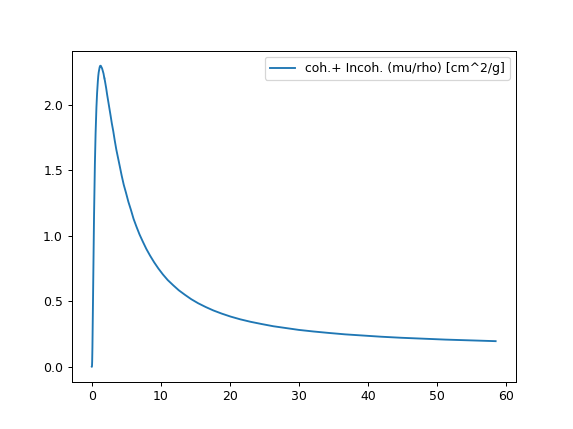

In [26]:
plt.figure()
#plt.plot(data[:,0], data[:,3], label = label[3])
plt.plot(data[:,0], data[:,4], label = label[4])
#plt.plot(data[:,0], data[:,5], label = label[5])

plt.legend()
#plt.ylim(0,3e2)